In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats   # useful for probabilistic distribution

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
delivery_df = pd.read_csv("delivery.csv")
delivery_df.head()

,n.prod,distance,delTime
0,7,560,16.68
1,3,220,11.50
2,3,340,12.03
3,4,80,14.88
4,6,150,13.75


In [4]:
print("Size of the data : ", delivery_df.shape)

Size of the data :  (25, 3)


#### Visualizing the entire dataframe

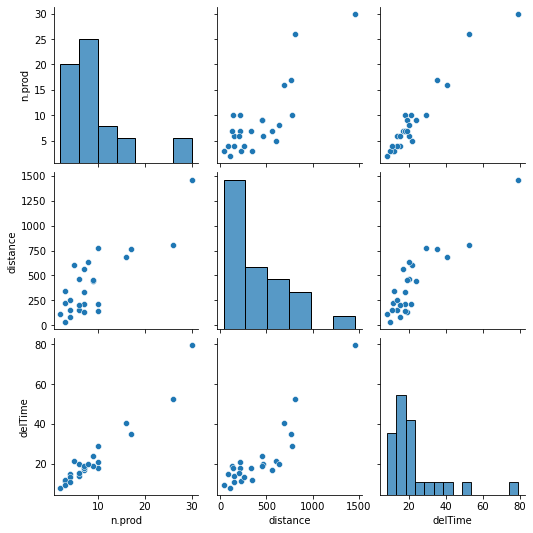

In [5]:
sns.pairplot(delivery_df)
plt.show()

In [6]:
from sklearn.linear_model import LinearRegression

In [7]:
multiple_reg = LinearRegression()
X = delivery_df[["n.prod","distance"]]
y = delivery_df["delTime"]
multiple_reg.fit(X,y)

LinearRegression()

In [8]:
print("Intercept :", multiple_reg.intercept_,"\nCoefficients :",multiple_reg.coef_)

Intercept : 2.3412311451922 
Coefficients : [1.61590721 0.01438483]


In [9]:
predictions = multiple_reg.predict(X)
predictions

array([21.70808432, 10.35361455, 12.0797937 ,  9.95564609, 14.19439835,
       18.39957428,  7.15537645, 16.67339513, 71.8202938 , 19.12358708,
       38.09250698, 21.5930409 , 12.47299068, 18.68246414, 23.3287982 ,
       29.66292843, 14.91363966, 15.55137869,  7.70680652, 40.88796994,
       20.51417893, 56.00652789, 23.35756786, 24.4028535 , 10.96258393])

#### Visualizing Multiple Linear Regression Model

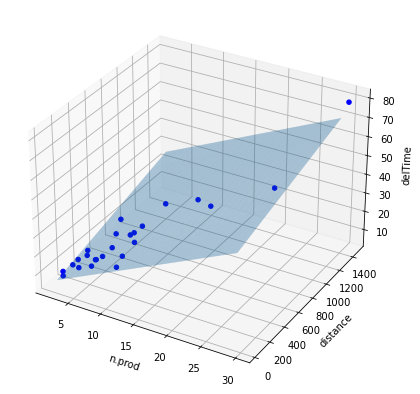

In [10]:
from mpl_toolkits.mplot3d import Axes3D
#Setting up the plot area
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111,projection='3d')

#3d scatterplot of the delivery dataset
ax.scatter(xs = delivery_df["n.prod"], ys = delivery_df["distance"], zs=delivery_df["delTime"],
           c='blue',
           alpha=1,
           marker='o')
ax.set_xlabel("n.prod")
ax.set_ylabel("distance")
ax.set_zlabel("delTime")

#Creating a mesh of x and y values to plot the regression plane
x_surf = np.arange(delivery_df["n.prod"].min(), delivery_df["n.prod"].max(), 1) 
y_surf = np.arange(delivery_df["distance"].min(), delivery_df["distance"].max(), 1)
x_surf, y_surf = np.meshgrid(x_surf, y_surf)
X_mesh = pd.DataFrame({'n.prod': x_surf.ravel(), 'distance': y_surf.ravel()})    #ravel convert columns into rows

#Predicting the output of model for every point in the mesh
out = multiple_reg.predict(X_mesh)

#Plotting the regression plane
ax.plot_surface(x_surf, y_surf,
                out.reshape(x_surf.shape),
                rstride=1,
                cstride=1,
                alpha = 0.4)
plt.show()

In [11]:
print( x_surf.ravel())

[ 2  3  4 ... 27 28 29]


#### RMSE

In [12]:
from sklearn.metrics import mean_squared_error

In [13]:
print("RMSE :", np.sqrt(mean_squared_error(y, predictions)))

RMSE : 3.0576571254511378


#### Coefficient of Determination or R-squared

In [14]:
multiple_reg.score(X,y)

0.9595937494832257

In [15]:
from sklearn.metrics import r2_score

In [16]:
r_squared = r2_score(y, predictions)
print("R-squared : ", r_squared)

R-squared :  0.9595937494832257


#### Adjusted R-squared

In [17]:
SS_Error = sum((y-predictions)**2)       
SS_Total = sum((y-np.mean(y))**2)     
r_squared = 1 - (float(SS_Error))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)
print("Adjusted R-squared : ", adjusted_r_squared)

Adjusted R-squared :  0.9559204539817008


#### VIF

In [18]:
import statsmodels

In [19]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

#Adding a constant column for the intercept. 
X1 = add_constant(X)
vif = pd.Series([variance_inflation_factor(X1.values,idx) 
           for idx in range(X1.shape[1])],
          index=X1.columns)
print(vif)

const       2.830380
n.prod      3.118474
distance    3.118474
dtype: float64


#### R-squared and Adjusted R-squared

#### Approach 2 - using statsmodels

In [20]:
import statsmodels.api as sm
X = sm.add_constant(delivery_df[["n.prod","distance"]])
y = delivery_df["delTime"]
multiple_reg = sm.OLS(y,X).fit()

In [21]:
multiple_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                delTime   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     261.2
Date:                Sat, 24 Dec 2022   Prob (F-statistic):           4.69e-16
Time:                        19:19:13   Log-Likelihood:                -63.415
No. Observations:                  25   AIC:                             132.8
Df Residuals:                      22   BIC:                             136.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.3412      1.097      2.135      0.044       0.067       4.616
n.prod         1.6159      0.171      9.464      0.000       1.262       1.970
distance       0.0144      0.004      3.981      0.001       0.007       0.022
==============================================================================
Omnibus:                        0.421   Durbin-Watson:                   1.170
Prob(Omnibus):                  0.810   Jarque-Bera (JB):                0.010
Skew:                           0.032   Prob(JB):                        0.995
Kurtosis:                       3.073   Cond. No.                         873.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""